<a href="https://colab.research.google.com/github/MemerGamer/IntelligensModszerekTantargy/blob/main/Klaszterezes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from google.colab import widgets
from typing import Tuple

from sklearn.metrics.pairwise import euclidean_distances

**Adatok betöltése**

In [2]:
data_in_frame = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

data = np.zeros( (len(data_in_frame), 4 ))
data[:,0] = data_in_frame['sepal length']
data[:,1] = data_in_frame['sepal width']
data[:,2] = data_in_frame['petal length']
data[:,3] = data_in_frame['petal width']

**1. feladat: Iris adatok klaszterezése k-means-zel**



(a) Írjon egy függvényt *initial_centroids* néven, amely visszaadja a kezdeti klaszterközéppontokat! Annak érdekében, hogy tanulmányozhassuk a kezdeti klaszterközéppontok hatását a klaszterezés eredményére, most ne véletlenszerűen válassza meg a kezdeti klaszterközéppontokat, hanem válassza a 60-dik, 70-dik és 80-dik példányokat kezdeti klaszterközéppontnak! A függvény az adattábla előbbi példányait adja vissza, mint kezdeti klaszterközéppontot!

(b) Írjon egy függvényt *calculate_clusters_of_instances* néven, amely meghatározza, hogy adott centroidok mellett mely klaszterekbe tartoznak az egyes példányok, a klaszterek sorszámozása kezdődjön 0-val. A függvény adjon vissza egy np.array-t, amely példányonként azt tartalmazza, hogy a hányadik klaszterba tartozik az adott példány!

(c) Írjon egy függvényt *calculate_new_centroids* néven, amely kiszámolja az új centroidokat!

(d) Annak érdekében, hogy meg tudjuk jeleníteni az algoritmus lépéseit, módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, hogy a  *clusters_of_instances_per_iteration* elnevezésű listába (np.arrayek listájába) mentse le minden iteráció végén az aktuális klaszterezést!

(e) Írjon egy függvényt *get_color* néven, amely a vörös, kék és sárga színeket rendeli a 0, 1, 2 számokhoz!

(f) Írja meg azt a kódrészletet, amely létrehoz egy listát *colors* néven, amely a legelső ('0-dik') iteráció végén keletkezett klaszterezés eredményének megfelelő színeket tartalmazza az adattábla egyes példányaira!

(g) Írja meg azt a kódrészletet, amely létrehozza egy listák listáját *colors_per_iteration* néven, amely az előbbi pontban létrehozott listához hasonló listákat tartalmaz minden egyes iteráció végén kapott klaszterezésnek megfelelően!

(h) A megadott kódrészlet segítségével jelenítse meg a klaszterezés menetét (a klazterezés eredményét az egyes iterációk végén), és értelmezze az ereményeket!

(i) Módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, minden egyes iteráció végén mentse le a klaszterközéppontokat. Írassa ki a klaszterközéppontokat és értelmezze az ereményeket!

(j) Módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, minden egyes iteráció végén számolja ki az azonos klaszterekbe került példányok közötti átlagos távolságot (intra-cluster distance)! Jelenítse meg az eredményeket a matplotlib.pyplot.plot() függvény segítségével!

(k) Módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, minden egyes iteráció végén számolja ki a különböző klaszterekbe került példányok közötti átlagos távolságot (inter-cluster distance)! Jelenítse meg az eredményeket a matplotlib.pyplot.plot() függvény segítségével!

(l) Módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, minden egyes iteráció végén számolja ki az egyes példányok hozzájuk legközelebbi klaszerközéponttól való átlagos távolságát! Jelenítse meg az eredményeket a matplotlib.pyplot.plot() függvény segítségével!

(m) Indítsa a klaszterezést a 25-dik, 75-dik, 125-dik példányokat használva kezdeti klaszterközéppontként! Hasonlítsa össze az eredményeket az előbbiekben kapott eredményekkel!

(n) Indítsa a klaszterezést az első, második és harmadik példányokat használva kezdeti klaszterközéppontként! Hasonlítsa össze az eredményeket az előbbiekben kapott eredményekkel!

In [4]:
# (a)
def initial_centroids(data, indices=[60, 70, 80]):
    return data[indices]

In [5]:
# (b)
def calculate_clusters_of_instances(data, centroids):
    distances = euclidean_distances(data, centroids)
    return np.argmin(distances, axis=1)

In [6]:
# (c)
def calculate_new_centroids(data, clusters_of_instances, num_clusters=3):
    new_centroids = np.zeros((num_clusters, data.shape[1]))
    for i in range(num_clusters):
        cluster_points = data[clusters_of_instances == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
    return new_centroids

In [9]:
num_iterations = 10
centroids = initial_centroids(data)
clusters_of_instances_per_iteration = []
centroids_per_iteration = []
intra_cluster_distances = []
inter_cluster_distances = []
avg_distance_to_centroid = []

for i in range(num_iterations):
    clusters_of_instances = calculate_clusters_of_instances(data, centroids)
    # (d)
    clusters_of_instances_per_iteration.append(clusters_of_instances)
    # (i)
    centroids_per_iteration.append(centroids.copy())

    # (j)
    intra_dist = 0
    intra_count = 0
    for cluster_idx in range(3):
        cluster_points = data[clusters_of_instances == cluster_idx]
        if len(cluster_points) > 1:
            cluster_distances = euclidean_distances(cluster_points)
            intra_dist += np.sum(cluster_distances) / 2
            intra_count += (len(cluster_points) * (len(cluster_points) - 1)) / 2

    if intra_count > 0:
        intra_cluster_distances.append(intra_dist / intra_count)
    else:
        intra_cluster_distances.append(0)

    # (k)
    inter_dist = 0
    inter_count = 0
    for c1 in range(3):
        for c2 in range(c1+1, 3):
            cluster_i_points = data[clusters_of_instances == c1]
            cluster_j_points = data[clusters_of_instances == c2]
            if len(cluster_i_points) > 0 and len(cluster_j_points) > 0:
                inter_cluster_dist = euclidean_distances(cluster_i_points, cluster_j_points)
                inter_dist += np.sum(inter_cluster_dist)
                inter_count += len(cluster_i_points) * len(cluster_j_points)

    if inter_count > 0:
        inter_cluster_distances.append(inter_dist / inter_count)
    else:
        inter_cluster_distances.append(0)

    # (l)
    min_distances = np.min(euclidean_distances(data, centroids), axis=1)
    avg_distance_to_centroid.append(np.mean(min_distances))

    centroids = calculate_new_centroids(data, clusters_of_instances)

In [10]:
def get_color(c):
    colors = ['red', 'blue', 'yellow']
    return colors[c % len(colors)]

In [11]:
colors = [get_color(clusters_of_instances_per_iteration[0][j]) for j in range(len(data))]

In [12]:
# (g)
colors_per_iteration = []
for i in range(num_iterations):
    iteration_colors = [get_color(clusters_of_instances_per_iteration[i][j]) for j in range(len(data))]
    colors_per_iteration.append(iteration_colors)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

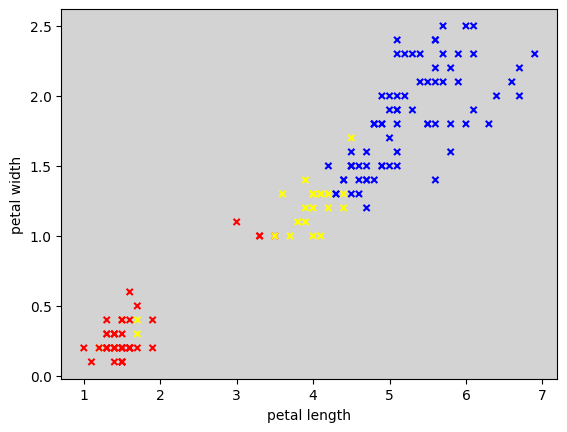

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

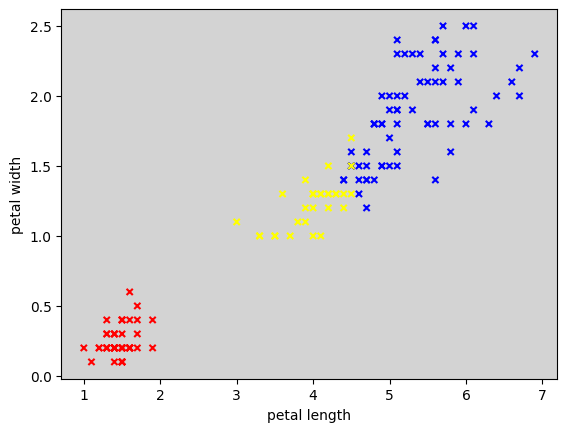

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

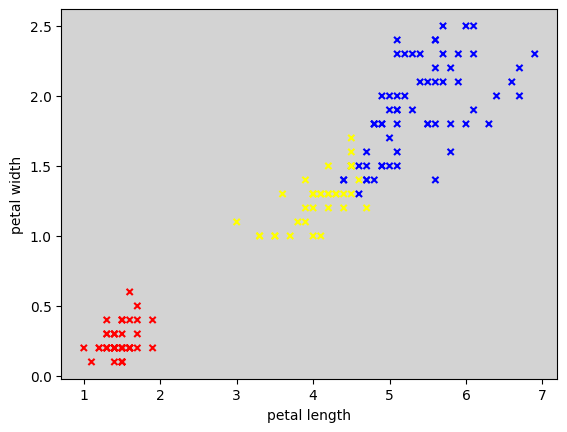

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

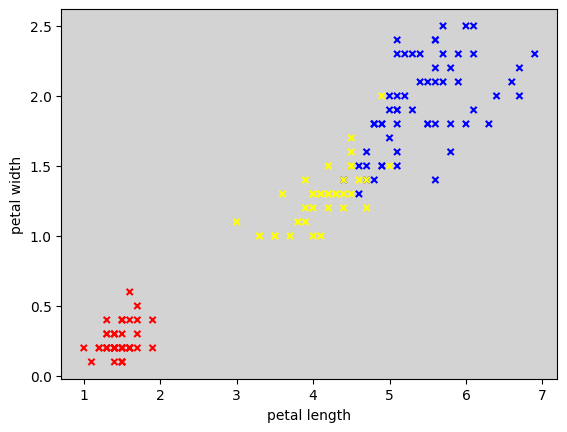

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

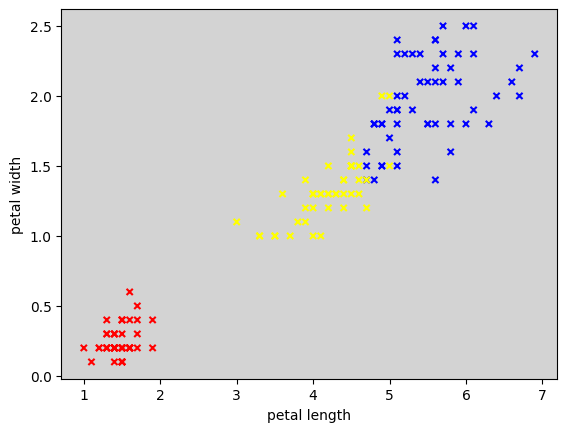

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

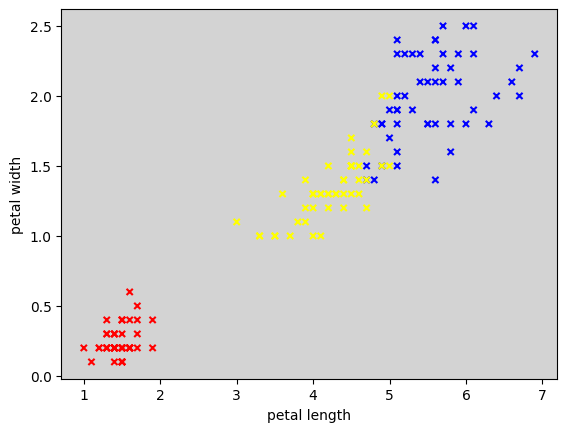

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

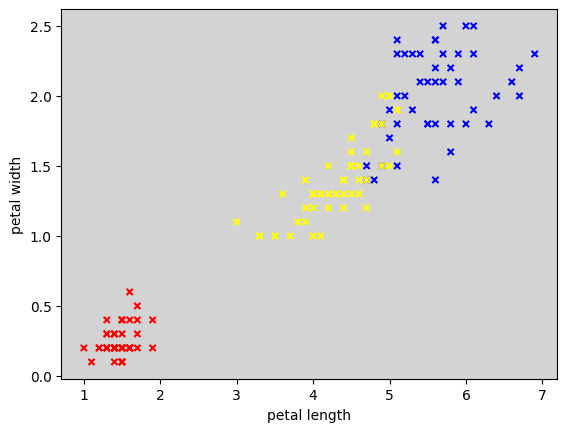

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

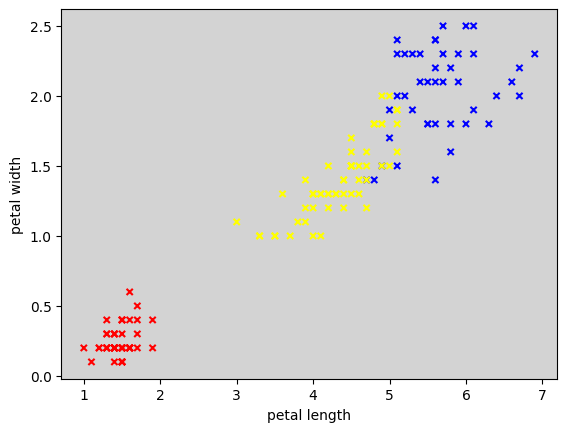

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

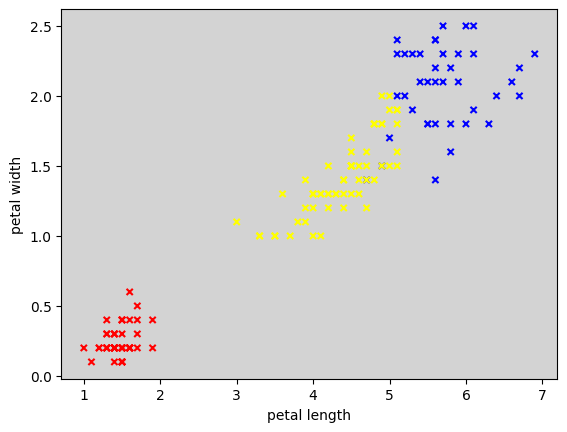

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

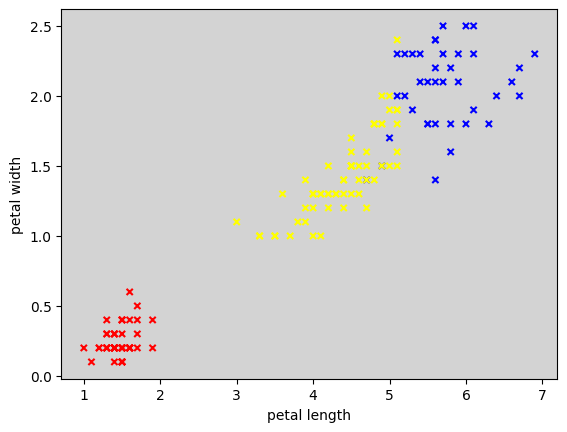

<IPython.core.display.Javascript object>

In [13]:
tb = widgets.TabBar(list(range(10)), location='top')

for i in range(num_iterations):
  with tb.output_to(i):
    p = data_in_frame.plot.scatter('petal length', 'petal width',
                                      c = colors_per_iteration[i], marker='x')
    p.set_facecolor('lightgrey')

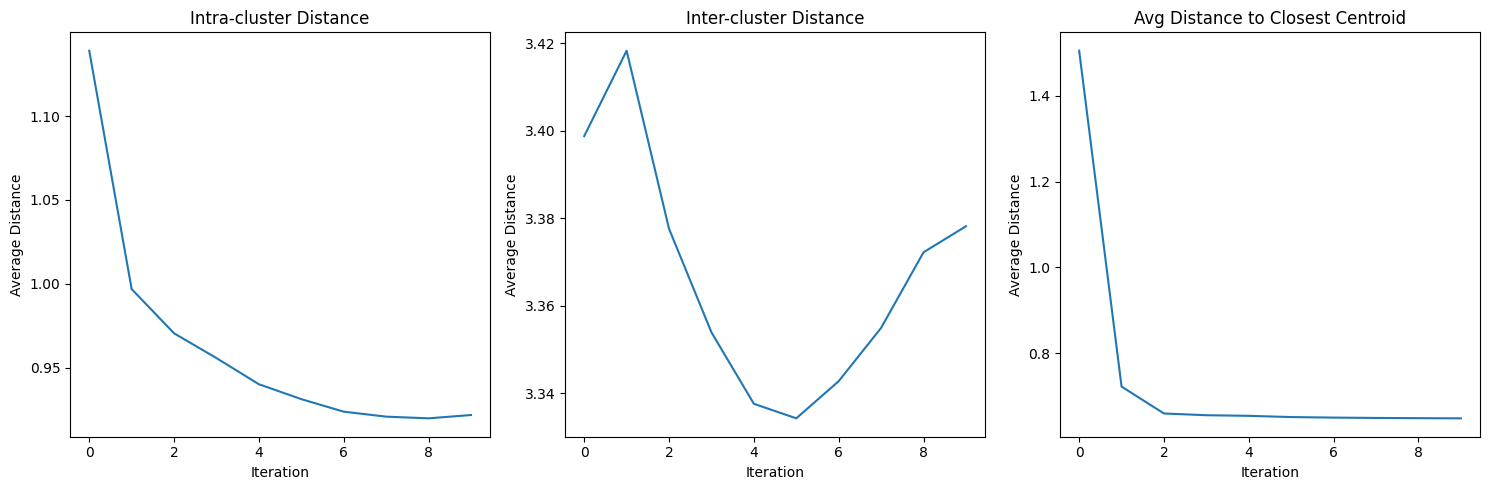

In [19]:
plt.figure(figsize=(15, 5))
# (j)
plt.subplot(1, 3, 1)
plt.plot(range(num_iterations), intra_cluster_distances)
plt.title('Intra-cluster Distance')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')

# (k)
plt.subplot(1, 3, 2)
plt.plot(range(num_iterations), inter_cluster_distances)
plt.title('Inter-cluster Distance')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')

# (l)
plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), avg_distance_to_centroid)
plt.title('Avg Distance to Closest Centroid')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')

plt.tight_layout()
plt.show()

In [20]:
# (i)
for i in range(num_iterations):
    print(f"Iteration {i}, Centroids:")
    print(centroids_per_iteration[i])
    print()

Iteration 0, Centroids:
[[5.  2.  3.5 1. ]
 [5.9 3.2 4.8 1.8]
 [5.5 2.4 3.8 1.1]]

Iteration 1, Centroids:
[[4.94285714 3.26122449 1.60816327 0.30204082]
 [6.50540541 2.98243243 5.25       1.84054054]
 [5.66296296 2.87407407 3.57407407 1.06666667]]

Iteration 2, Centroids:
[[5.006      3.418      1.464      0.244     ]
 [6.55652174 2.97536232 5.31449275 1.87391304]
 [5.60645161 2.64193548 3.99677419 1.23548387]]

Iteration 3, Centroids:
[[5.006      3.418      1.464      0.244     ]
 [6.59375    2.984375   5.3734375  1.9078125 ]
 [5.67222222 2.67222222 4.075      1.26388889]]

Iteration 4, Centroids:
[[5.006      3.418      1.464      0.244     ]
 [6.62833333 3.00166667 5.415      1.93      ]
 [5.7125     2.6775     4.1425     1.295     ]]

Iteration 5, Centroids:
[[5.006      3.418      1.464      0.244     ]
 [6.65090909 3.01090909 5.48727273 1.96545455]
 [5.78666667 2.70222222 4.19555556 1.32222222]]

Iteration 6, Centroids:
[[5.006      3.418      1.464      0.244     ]
 [6.6921568


===== Starting K-means with centroids at indices 25, 75, 125 =====


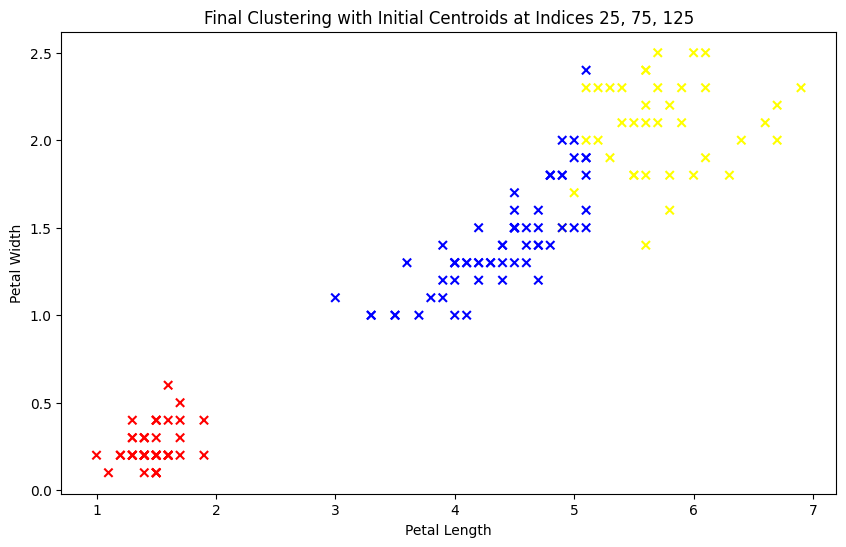

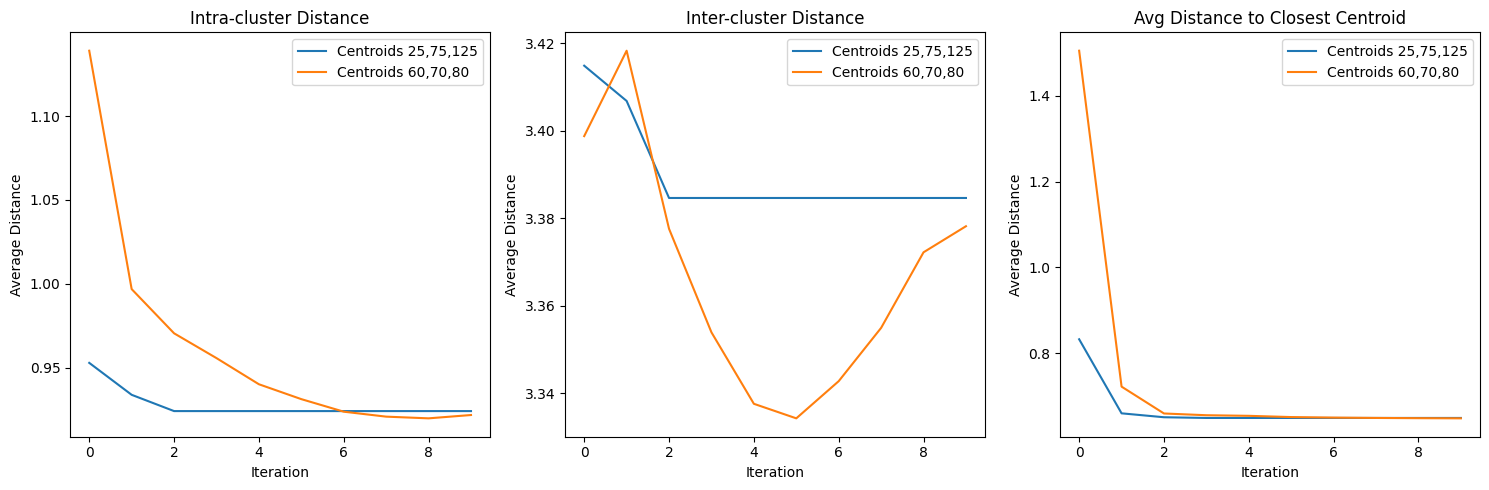

In [21]:
# (m)
print("\n===== Starting K-means with centroids at indices 25, 75, 125 =====")
num_iterations = 10
centroids_m = initial_centroids(data, [25, 75, 125])
clusters_m_per_iteration = []
centroids_m_per_iteration = []
intra_cluster_distances_m = []
inter_cluster_distances_m = []
avg_distance_to_centroid_m = []

for i in range(num_iterations):
    clusters_m = calculate_clusters_of_instances(data, centroids_m)
    clusters_m_per_iteration.append(clusters_m)
    centroids_m_per_iteration.append(centroids_m.copy())

    # Calculate metrics as before
    # Intra-cluster distance
    intra_dist = 0
    intra_count = 0
    for cluster_idx in range(3):
        cluster_points = data[clusters_m == cluster_idx]
        if len(cluster_points) > 1:
            cluster_distances = euclidean_distances(cluster_points)
            intra_dist += np.sum(cluster_distances) / 2
            intra_count += (len(cluster_points) * (len(cluster_points) - 1)) / 2

    if intra_count > 0:
        intra_cluster_distances_m.append(intra_dist / intra_count)
    else:
        intra_cluster_distances_m.append(0)

    # Inter-cluster distance
    inter_dist = 0
    inter_count = 0
    for c1 in range(3):
        for c2 in range(c1+1, 3):
            cluster_i_points = data[clusters_m == c1]
            cluster_j_points = data[clusters_m == c2]
            if len(cluster_i_points) > 0 and len(cluster_j_points) > 0:
                inter_cluster_dist = euclidean_distances(cluster_i_points, cluster_j_points)
                inter_dist += np.sum(inter_cluster_dist)
                inter_count += len(cluster_i_points) * len(cluster_j_points)

    if inter_count > 0:
        inter_cluster_distances_m.append(inter_dist / inter_count)
    else:
        inter_cluster_distances_m.append(0)

    # Distance to closest centroid
    min_distances = np.min(euclidean_distances(data, centroids_m), axis=1)
    avg_distance_to_centroid_m.append(np.mean(min_distances))

    centroids_m = calculate_new_centroids(data, clusters_m)

colors_m_per_iteration = []
for i in range(num_iterations):
    iteration_colors = [get_color(clusters_m_per_iteration[i][j]) for j in range(len(data))]
    colors_m_per_iteration.append(iteration_colors)

# Visualize the last iteration
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 2], data[:, 3], c=colors_m_per_iteration[-1], marker='x')
plt.title('Final Clustering with Initial Centroids at Indices 25, 75, 125')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Plot metrics for comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(num_iterations), intra_cluster_distances_m, label='Centroids 25,75,125')
plt.plot(range(num_iterations), intra_cluster_distances, label='Centroids 60,70,80')
plt.title('Intra-cluster Distance')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(num_iterations), inter_cluster_distances_m, label='Centroids 25,75,125')
plt.plot(range(num_iterations), inter_cluster_distances, label='Centroids 60,70,80')
plt.title('Inter-cluster Distance')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), avg_distance_to_centroid_m, label='Centroids 25,75,125')
plt.plot(range(num_iterations), avg_distance_to_centroid, label='Centroids 60,70,80')
plt.title('Avg Distance to Closest Centroid')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')
plt.legend()

plt.tight_layout()
plt.show()


===== Starting K-means with centroids at indices 0, 1, 2 =====


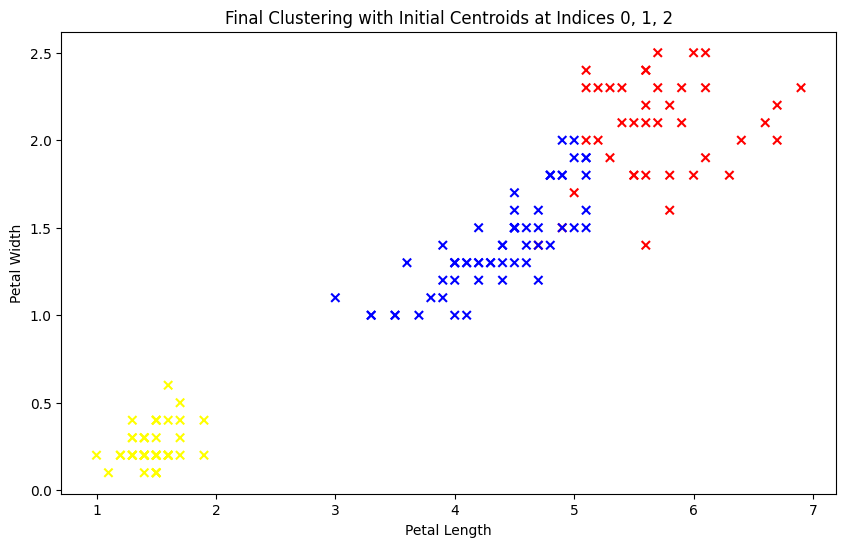

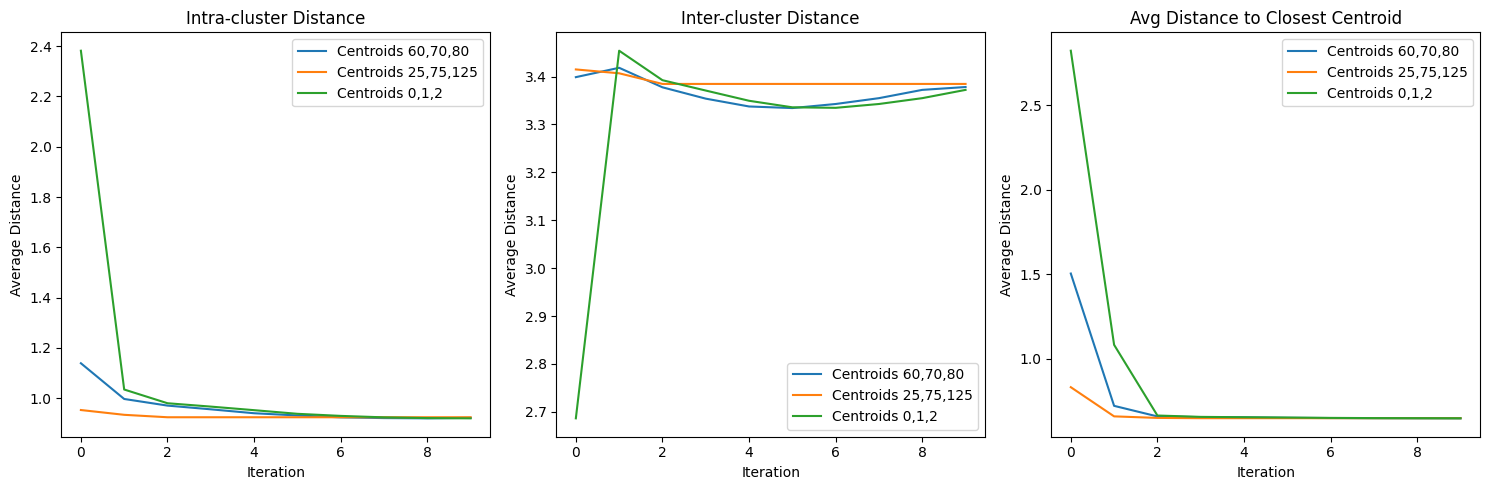

In [22]:
# (n)
print("\n===== Starting K-means with centroids at indices 0, 1, 2 =====")
num_iterations = 10
centroids_n = initial_centroids(data, [0, 1, 2])
clusters_n_per_iteration = []
centroids_n_per_iteration = []
intra_cluster_distances_n = []
inter_cluster_distances_n = []
avg_distance_to_centroid_n = []

for i in range(num_iterations):
    clusters_n = calculate_clusters_of_instances(data, centroids_n)
    clusters_n_per_iteration.append(clusters_n)
    centroids_n_per_iteration.append(centroids_n.copy())

    # Calculate metrics as before
    # Intra-cluster distance
    intra_dist = 0
    intra_count = 0
    for cluster_idx in range(3):
        cluster_points = data[clusters_n == cluster_idx]
        if len(cluster_points) > 1:
            cluster_distances = euclidean_distances(cluster_points)
            intra_dist += np.sum(cluster_distances) / 2
            intra_count += (len(cluster_points) * (len(cluster_points) - 1)) / 2

    if intra_count > 0:
        intra_cluster_distances_n.append(intra_dist / intra_count)
    else:
        intra_cluster_distances_n.append(0)

    # Inter-cluster distance
    inter_dist = 0
    inter_count = 0
    for c1 in range(3):
        for c2 in range(c1+1, 3):
            cluster_i_points = data[clusters_n == c1]
            cluster_j_points = data[clusters_n == c2]
            if len(cluster_i_points) > 0 and len(cluster_j_points) > 0:
                inter_cluster_dist = euclidean_distances(cluster_i_points, cluster_j_points)
                inter_dist += np.sum(inter_cluster_dist)
                inter_count += len(cluster_i_points) * len(cluster_j_points)

    if inter_count > 0:
        inter_cluster_distances_n.append(inter_dist / inter_count)
    else:
        inter_cluster_distances_n.append(0)

    # Distance to closest centroid
    min_distances = np.min(euclidean_distances(data, centroids_n), axis=1)
    avg_distance_to_centroid_n.append(np.mean(min_distances))

    centroids_n = calculate_new_centroids(data, clusters_n)

colors_n_per_iteration = []
for i in range(num_iterations):
    iteration_colors = [get_color(clusters_n_per_iteration[i][j]) for j in range(len(data))]
    colors_n_per_iteration.append(iteration_colors)

# Visualize the last iteration
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 2], data[:, 3], c=colors_n_per_iteration[-1], marker='x')
plt.title('Final Clustering with Initial Centroids at Indices 0, 1, 2')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Compare metrics for all three initializations
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(num_iterations), intra_cluster_distances, label='Centroids 60,70,80')
plt.plot(range(num_iterations), intra_cluster_distances_m, label='Centroids 25,75,125')
plt.plot(range(num_iterations), intra_cluster_distances_n, label='Centroids 0,1,2')
plt.title('Intra-cluster Distance')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(num_iterations), inter_cluster_distances, label='Centroids 60,70,80')
plt.plot(range(num_iterations), inter_cluster_distances_m, label='Centroids 25,75,125')
plt.plot(range(num_iterations), inter_cluster_distances_n, label='Centroids 0,1,2')
plt.title('Inter-cluster Distance')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), avg_distance_to_centroid, label='Centroids 60,70,80')
plt.plot(range(num_iterations), avg_distance_to_centroid_m, label='Centroids 25,75,125')
plt.plot(range(num_iterations), avg_distance_to_centroid_n, label='Centroids 0,1,2')
plt.title('Avg Distance to Closest Centroid')
plt.xlabel('Iteration')
plt.ylabel('Average Distance')
plt.legend()

plt.tight_layout()
plt.show()

**2. feladat: klaszterező algoritmusok scikit-learn-ben**

(a) k-means: tanulmányozza az alábbi kódot és változtassa meg a keresendő klaszterek számát 4-re!

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]
[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.006      3.418      1.464      0.244     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [6.2525     2.855      4.815      1.625     ]]


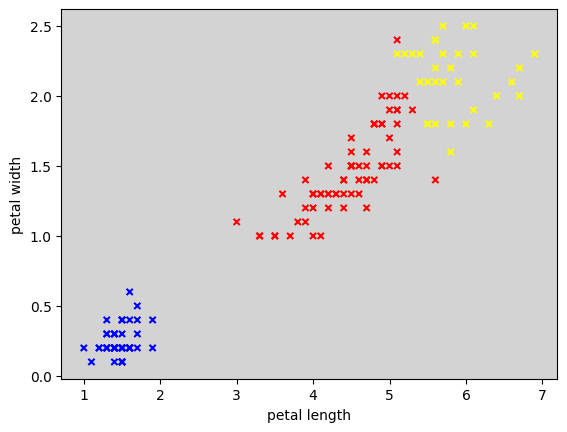

In [29]:
colors = [get_color(kmeans.labels_[j]) for j in range(len(data))]
p = data_in_frame.plot.scatter('petal length', 'petal width',
                                c = colors, marker='x')
p.set_facecolor('lightgrey')

(b) Tanulmányozza az alábbi kódot és próbálja ki a hierarchikus klaszterező előadáson tanult változatait (single link, complete link, average link)!

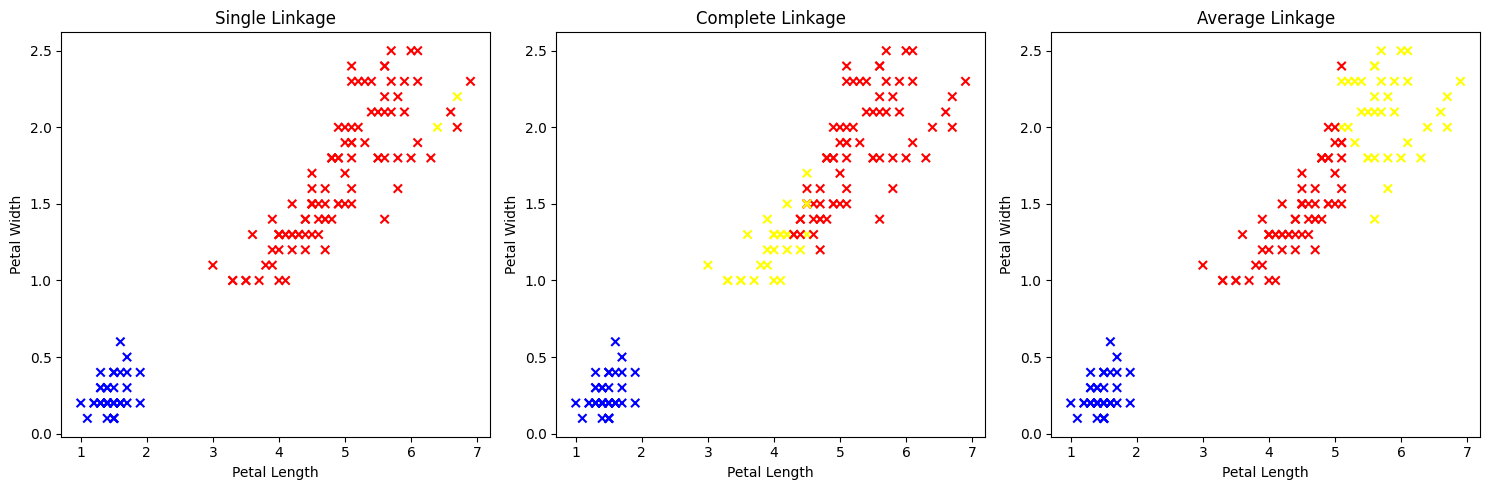

In [30]:
from sklearn.cluster import AgglomerativeClustering

model_single = AgglomerativeClustering(n_clusters=3, linkage='single')
model_single = model_single.fit(data)

model_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
model_complete = model_complete.fit(data)

model_average = AgglomerativeClustering(n_clusters=3, linkage='average')
model_average = model_average.fit(data)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
colors_single = [get_color(model_single.labels_[j]) for j in range(len(data))]
plt.scatter(data[:, 2], data[:, 3], c=colors_single, marker='x')
plt.title('Single Linkage')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 3, 2)
colors_complete = [get_color(model_complete.labels_[j]) for j in range(len(data))]
plt.scatter(data[:, 2], data[:, 3], c=colors_complete, marker='x')
plt.title('Complete Linkage')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 3, 3)
colors_average = [get_color(model_average.labels_[j]) for j in range(len(data))]
plt.scatter(data[:, 2], data[:, 3], c=colors_average, marker='x')
plt.title('Average Linkage')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

A klaszterezés eredményét ún. dendogramon is ábrázolhatjuk.

Lásd még: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

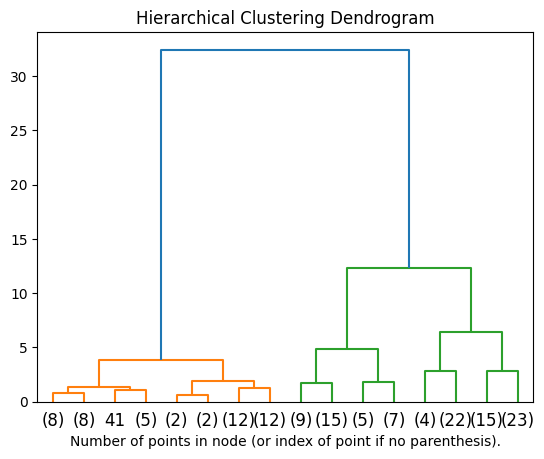

In [31]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()